Class Distribution:
0    542
1     26
Name: diagnostic, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.40      0.57         5

    accuracy                           0.97       114
   macro avg       0.99      0.70      0.78       114
weighted avg       0.97      0.97      0.97       114



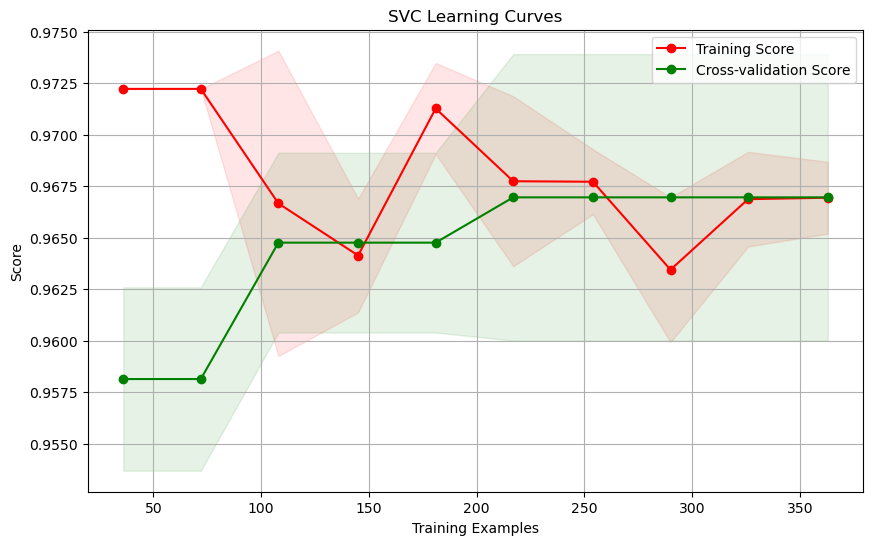

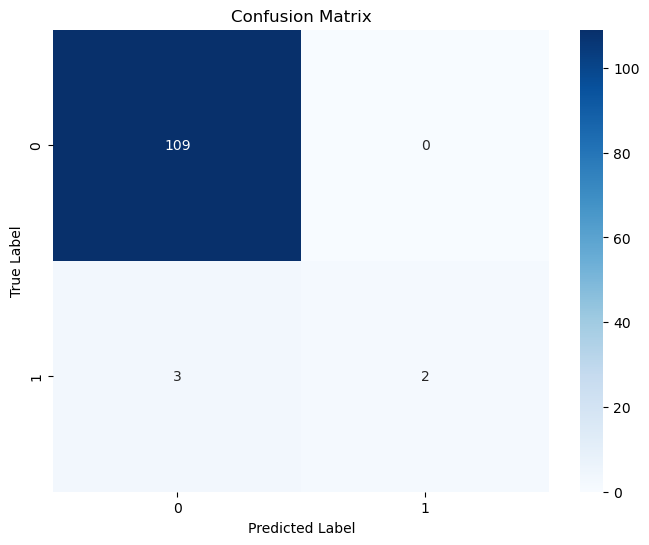

In [1]:
# SVC - Support Vector Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Check class distribution
class_distribution = data['diagnostic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the classifier pipeline (SVC)
classifier = make_pipeline(StandardScaler(), SVC(probability=True))

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("SVC Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")

# Generate predictions
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import joblib  # For saving and loading the trained classifier

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Define the classifier pipeline (SVC)
classifier = make_pipeline(StandardScaler(), SVC(probability=True))

# Fit the classifier on the entire dataset
classifier.fit(X, y)

# Save the trained classifier to a file
joblib.dump(classifier, 'trained_classifier_q.pkl')

# Load the saved classifier
loaded_classifier = joblib.load('trained_classifier_q.pkl')

# Predict probabilities for all images in the dataset
probabilities = loaded_classifier.predict_proba(X)

# Show probabilities for melanoma for all images
print("Probabilities for Melanoma:")
print(probabilities[:, 1])  # Assuming 1 represents the class label for melanoma

Probabilities for Melanoma:
[0.0334451  0.03346888 0.03337901 0.03346888 0.03345909 0.03345909
 0.03346888 0.03343255 0.03346888 0.03345909 0.03345909 0.03341982
 0.03345909 0.03346888 0.03345909 0.03345909 0.03346888 0.03337901
 0.0334451  0.03345909 0.03346888 0.03346888 0.03346888 0.03346888
 0.03337901 0.03345909 0.0334451  0.03347528 0.03347528 0.03346147
 0.03345909 0.03337901 0.03337526 0.03345909 0.03337901 0.03347528
 0.03337464 0.03345909 0.03346888 0.03345909 0.03337901 0.03337901
 0.0334451  0.03346888 0.03345909 0.03345909 0.03343255 0.03337526
 0.03346888 0.03337901 0.03346888 0.03346888 0.03346888 0.03346888
 0.03345909 0.03345909 0.03337901 0.03337901 0.03346888 0.03337901
 0.03347528 0.03346888 0.03337901 0.03346888 0.03345909 0.03337901
 0.03347528 0.03341982 0.03337464 0.03337901 0.0334451  0.03337464
 0.03347528 0.03337901 0.03346147 0.0334451  0.03337901 0.03347528
 0.03346888 0.03345909 0.03345909 0.03346888 0.03345909 0.03337901
 0.03345909 0.03347528 0.03345909 

Class Distribution:
0    542
1     26
Name: diagnostic, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.40      0.57         5

    accuracy                           0.97       114
   macro avg       0.99      0.70      0.78       114
weighted avg       0.97      0.97      0.97       114



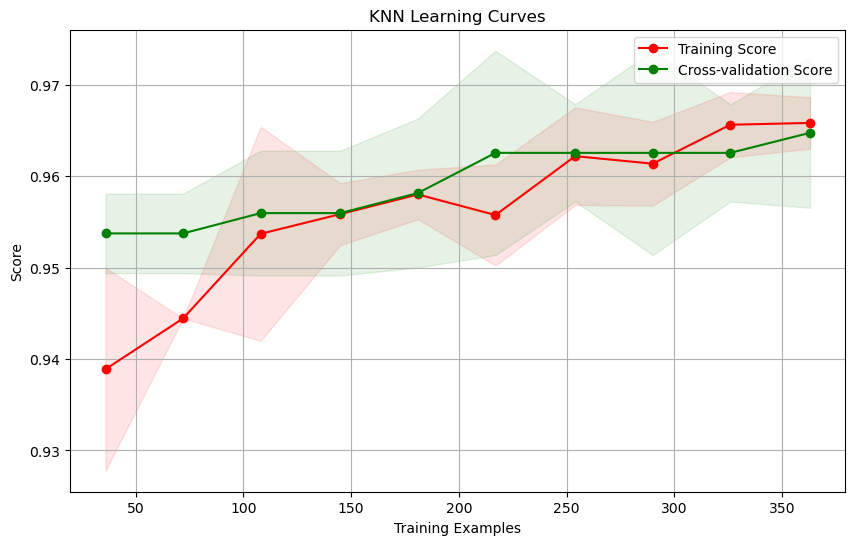

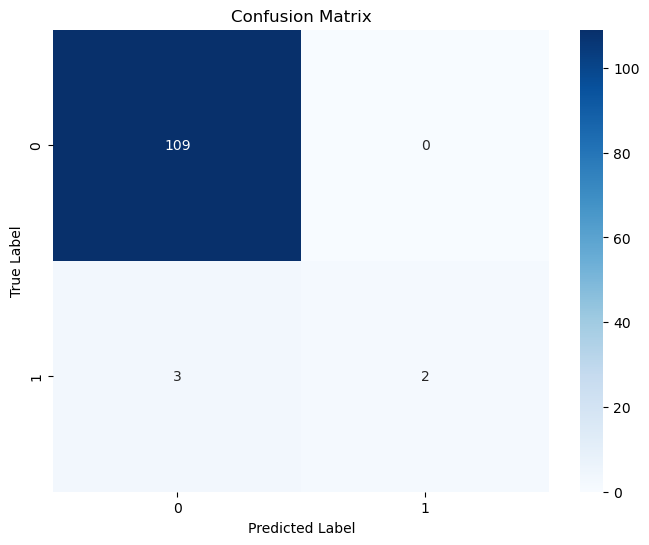

In [3]:
# KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Check class distribution
class_distribution = data['diagnostic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the classifier pipeline (KNN)
classifier = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("KNN Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")

# Generate predictions
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import joblib  # For saving and loading the trained classifier

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Define the classifier pipeline (KNN)
classifier = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Fit the classifier on the entire dataset
classifier.fit(X, y)

# Save the trained classifier to a file
joblib.dump(classifier, 'trained_knn_classifier.pkl')

# Load the saved classifier
loaded_classifier = joblib.load('trained_knn_classifier.pkl')

# Predict probabilities for all images in the dataset
probabilities = loaded_classifier.predict_proba(X)

# Show probabilities for melanoma for all images
print("Probabilities for Melanoma:")
print(probabilities[:, 1])  # Assuming 1 represents the class label for melanoma

Probabilities for Melanoma:
[0.  0.2 0.  0.2 0.  0.  0.2 0.  0.2 0.  0.  0.  0.  0.2 0.  0.  0.2 0.
 0.  0.  0.2 0.2 0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0.2 0.2 0.2 0.2
 0.  0.  0.  0.  0.2 0.  0.  0.2 0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.2 0.  0.  0.2 0.  0.2 0.  0.  0.
 0.  0.  0.  0.2 0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.2 0.  0.  0.  0.  0.  0.2
 0.2 0.  0.  0.2 0.  0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0.  0.  0.2 0.2
 0.  0.2 0.2 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.2 0.  0.2 0.  0.2
 0.2 0.2 0.  0.2 0.2 0.2 0.2 0.  0.  0.  0.  0.  0.2 0.2 0.  0.2 0.2 0.
 0.  0.  0.  0.2 0.2 0.2 0.  0. 

Class Distribution:
0    542
1     26
Name: diagnostic, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.40      0.57         5

    accuracy                           0.97       114
   macro avg       0.99      0.70      0.78       114
weighted avg       0.97      0.97      0.97       114



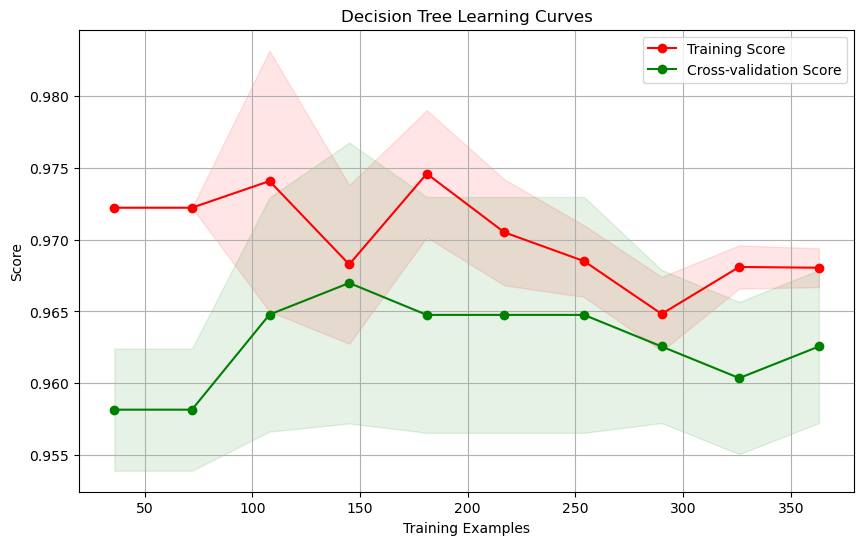

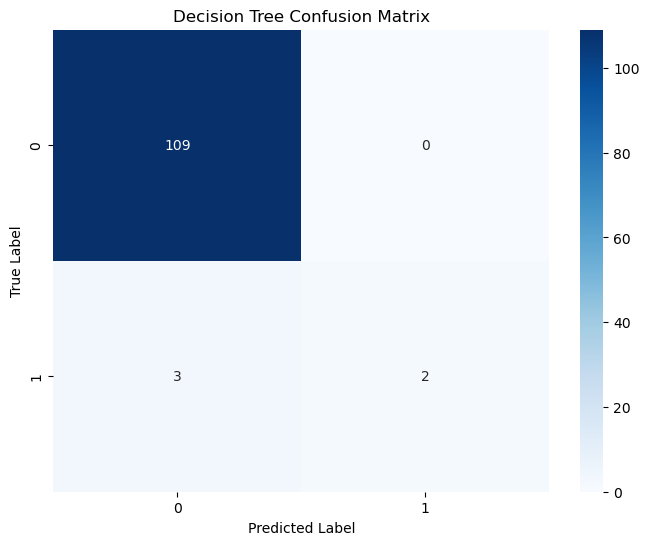

In [5]:
# decision tree
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Check class distribution
class_distribution = data['diagnostic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the classifier pipeline (Decision Tree)
classifier = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Decision Tree Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")

# Generate predictions
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import joblib  # For saving and loading the trained classifier

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Define the classifier pipeline (Decision Tree)
classifier = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Fit the classifier on the entire dataset
classifier.fit(X, y)

# Save the trained classifier to a file
joblib.dump(classifier, 'trained_decision_tree_classifier.pkl')

# Load the saved classifier
loaded_classifier = joblib.load('trained_decision_tree_classifier.pkl')

# Predict probabilities for all images in the dataset
probabilities = loaded_classifier.predict_proba(X)

# Show probabilities for melanoma for all images
print("Probabilities for Melanoma:")
print(probabilities[:, 1])  # Assuming 1 represents the class label for melanoma

Probabilities for Melanoma:
[0.         0.06722689 0.03191489 0.06722689 0.02105263 0.02105263
 0.06722689 0.01388889 0.06722689 0.02105263 0.02105263 0.14285714
 0.02105263 0.06722689 0.02105263 0.02105263 0.06722689 0.03191489
 0.         0.02105263 0.06722689 0.06722689 0.06722689 0.06722689
 0.03191489 0.02105263 0.         0.         0.         0.
 0.02105263 0.03191489 0.         0.02105263 0.03191489 0.
 0.         0.02105263 0.06722689 0.02105263 0.03191489 0.03191489
 0.         0.06722689 0.02105263 0.02105263 0.01388889 0.
 0.06722689 0.03191489 0.06722689 0.06722689 0.06722689 0.06722689
 0.02105263 0.02105263 0.03191489 0.03191489 0.06722689 0.03191489
 0.         0.06722689 0.03191489 0.06722689 0.02105263 0.03191489
 0.         0.14285714 0.         0.03191489 0.         0.
 0.         0.03191489 0.         0.         0.03191489 0.
 0.06722689 0.02105263 0.02105263 0.06722689 0.02105263 0.03191489
 0.02105263 0.         0.02105263 0.02105263 0.02105263 0.02105263
 0.    

Class Distribution:
0    542
1     26
Name: diagnostic, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.40      0.57         5

    accuracy                           0.97       114
   macro avg       0.99      0.70      0.78       114
weighted avg       0.97      0.97      0.97       114



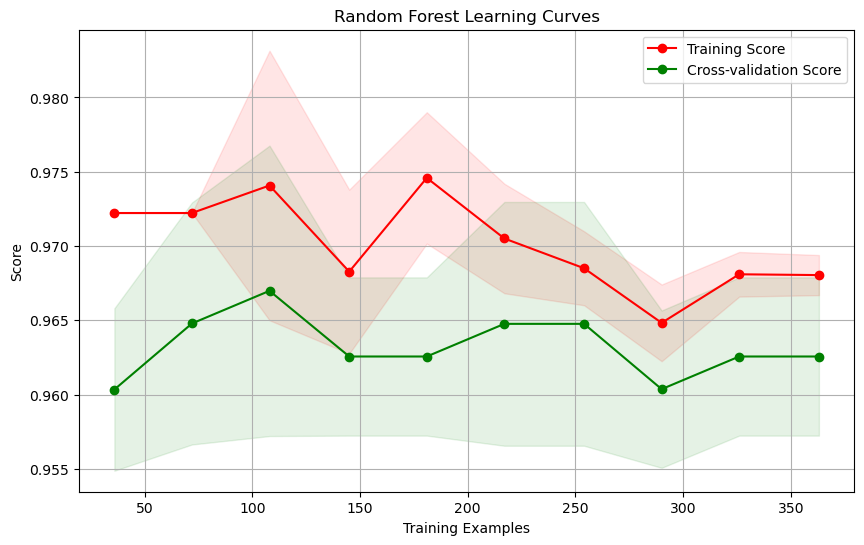

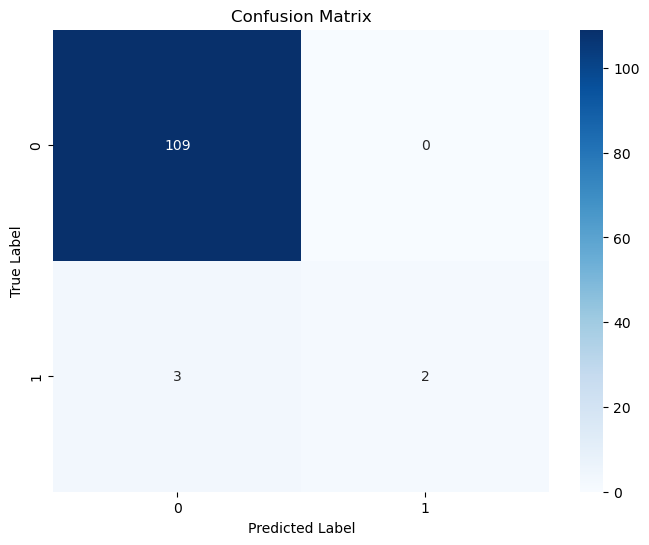

In [7]:
# random forest
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Check class distribution
class_distribution = data['diagnostic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the classifier pipeline (Random Forest Classifier)
classifier = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Random Forest Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")

# Generate predictions
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib  # For saving and loading the trained classifier

# Load data from CSV with the correct delimiter
data = pd.read_csv('C:/Users/jkgas/OneDrive/Documents/GitHub/G/for_classifier.csv', delimiter=';')

# Extract features and labels
X = data[['color_score', 'symmetry_score', 'blue_white_score']].values
y = data['diagnostic'].values  # Assuming 'diagnostic' column contains the class labels (0 or 1)

# Define the classifier pipeline (Random Forest)
classifier = make_pipeline(StandardScaler(), RandomForestClassifier())

# Fit the classifier on the entire dataset
classifier.fit(X, y)

# Save the trained classifier to a file
joblib.dump(classifier, 'trained_random_forest_classifier.pkl')

# Load the saved classifier
loaded_classifier = joblib.load('trained_random_forest_classifier.pkl')

# Predict probabilities for all images in the dataset
probabilities = loaded_classifier.predict_proba(X)

# Show probabilities for melanoma for all images
print("Probabilities for Melanoma:")
print(probabilities[:, 1])  # Assuming 1 represents the class label for melanoma

Probabilities for Melanoma:
[0.         0.06728805 0.02914014 0.06728805 0.01883711 0.01883711
 0.06728805 0.01374572 0.06728805 0.01883711 0.01883711 0.14672083
 0.01883711 0.06728805 0.01883711 0.01883711 0.06728805 0.02914014
 0.         0.01883711 0.06728805 0.06728805 0.06728805 0.06728805
 0.02914014 0.01883711 0.         0.         0.         0.
 0.01883711 0.02914014 0.         0.01883711 0.02914014 0.
 0.         0.01883711 0.06728805 0.01883711 0.02914014 0.02914014
 0.         0.06728805 0.01883711 0.01883711 0.01374572 0.
 0.06728805 0.02914014 0.06728805 0.06728805 0.06728805 0.06728805
 0.01883711 0.01883711 0.02914014 0.02914014 0.06728805 0.02914014
 0.         0.06728805 0.02914014 0.06728805 0.01883711 0.02914014
 0.         0.14672083 0.         0.02914014 0.         0.
 0.         0.02914014 0.         0.         0.02914014 0.
 0.06728805 0.01883711 0.01883711 0.06728805 0.01883711 0.02914014
 0.01883711 0.         0.01883711 0.01883711 0.01883711 0.01883711
 0.    